In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot
import  matplotlib.pyplot as plt
from tensorflow.keras import models
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten


In [2]:
dataset_path_train = "/content/drive/MyDrive/17Flowers/train"

idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,

    # data augmentation

    zoom_range=0.2,
    rotation_range=16,
    horizontal_flip=True

)

train_data = idg.flow_from_directory(
    dataset_path_train,
    shuffle=True,
    subset="training",
    target_size=(224,224),

)

validation_data = idg.flow_from_directory(
    dataset_path_train,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.


In [4]:
model = models.Sequential([
    Conv2D(32, (3, 3), strides=(2, 2), activation="relu", padding="same", input_shape=(224, 224, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"),
    Conv2D(128, (3, 3),  strides=(1, 1), activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, (3, 3), strides=(1, 1), activation="relu" , padding="same"),
    MaxPooling2D(),
    Conv2D(512, (3, 3), strides=(1, 1), activation="relu" , padding="same" ),
    MaxPooling2D(),

    Flatten(),

    Dense(1024, activation="tanh"),
    Dense(17, activation="softmax"),
])


In [5]:

model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )


history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=20)



Epoch 1/20
29/29 [==============================] - 26s 629ms/step - loss: 2.9913 - accuracy: 0.0638 - val_loss: 2.4886 - val_accuracy: 0.2000
Epoch 2/20
29/29 [==============================] - 20s 696ms/step - loss: 2.4819 - accuracy: 0.1708 - val_loss: 2.0996 - val_accuracy: 0.2632
Epoch 3/20
29/29 [==============================] - 19s 641ms/step - loss: 2.1830 - accuracy: 0.2551 - val_loss: 1.9237 - val_accuracy: 0.3053
Epoch 4/20
29/29 [==============================] - 18s 632ms/step - loss: 1.9413 - accuracy: 0.3276 - val_loss: 1.7234 - val_accuracy: 0.3158
Epoch 5/20
29/29 [==============================] - 20s 703ms/step - loss: 1.7913 - accuracy: 0.3600 - val_loss: 1.5800 - val_accuracy: 0.4211
Epoch 6/20
29/29 [==============================] - 18s 639ms/step - loss: 1.6590 - accuracy: 0.4065 - val_loss: 1.5211 - val_accuracy: 0.4737
Epoch 7/20
29/29 [==============================] - 19s 674ms/step - loss: 1.5183 - accuracy: 0.4768 - val_loss: 1.3955 - val_accuracy: 0.4842

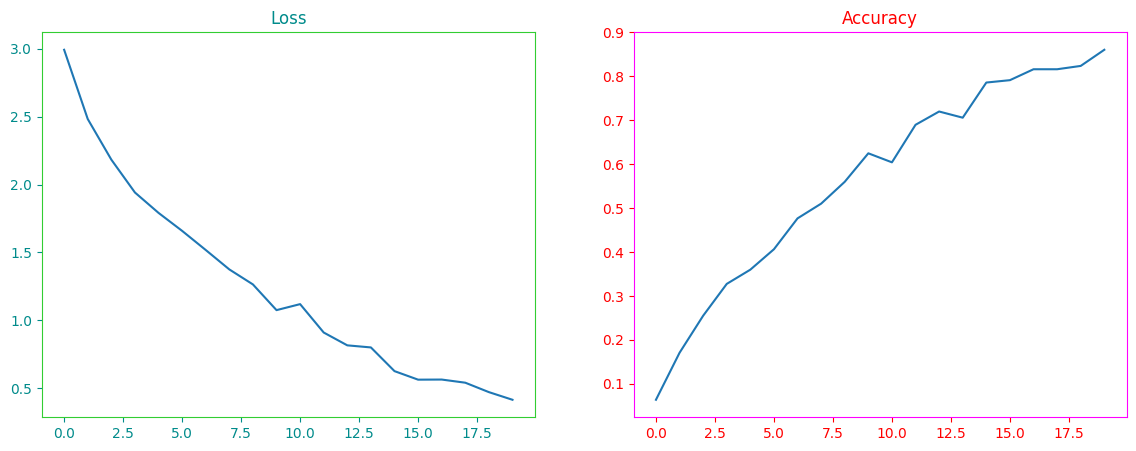

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(history.history['loss'])
ax1.set_title("Loss")
ax1.title.set_color('darkcyan')
ax1.tick_params(axis='x' , colors='darkcyan')
ax1.tick_params(axis='y' , colors='darkcyan')
ax1.spines['bottom'].set_color('limegreen')
ax1.spines['right'].set_color('limegreen')
ax1.spines['left'].set_color('limegreen')
ax1.spines['top'].set_color('limegreen')
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
ax2.title.set_color('red')
ax2.tick_params(axis='x' , colors='red')
ax2.tick_params(axis='y' , colors='red')
ax2.spines['bottom'].set_color('magenta')
ax2.spines['right'].set_color('magenta')
ax2.spines['left'].set_color('magenta')
ax2.spines['top'].set_color('magenta')
plt.show()



In [7]:
from sklearn.utils import shuffle
dataset_path_test = '/content/drive/MyDrive/17Flowers/test'

idg = ImageDataGenerator(rescale=1./255)

test_data = idg.flow_from_directory(
    dataset_path_test,
    shuffle=False,
    target_size=(224,224)

)

Found 340 images belonging to 17 classes.


In [8]:
model.evaluate(test_data)

11/11 [==============================] - 2s 182ms/step - loss: 1.1714 - accuracy: 0.7059


[1.1714333295822144, 0.7058823704719543]

In [14]:
model.save('weights/flowerـrecognition_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
model = load_model('/content/weights/flowerـrecognition_model.h5')


In [11]:
Y_pred = model.predict(test_data)
y_predict = np.argmax(Y_pred , axis=1)


11/11 [==============================] - 2s 138ms/step


In [12]:
print(validation_data.classes)

[ 0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  4  4
  4  4  4  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8
  9  9  9  9  9  9 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12 13
 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15 16 16 16 16 16 16]


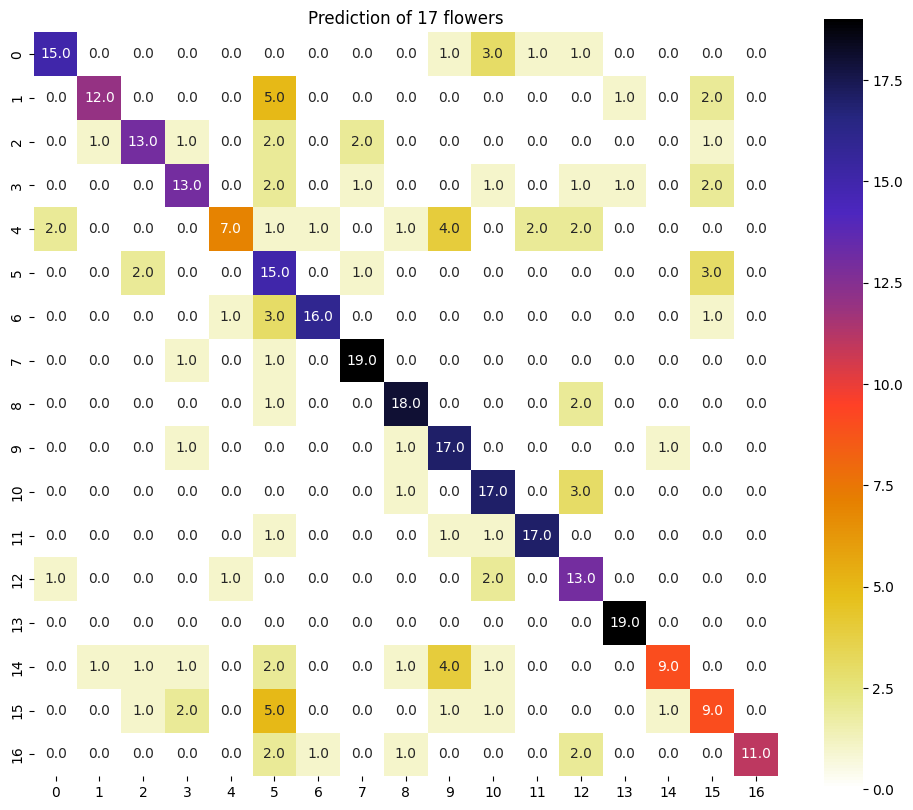

In [13]:
cm = confusion_matrix(test_data.classes , y_predict)
fig , ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm , annot=True , cmap='CMRmap_r', fmt='.1f' , ax=ax)
plt.title("Prediction of 17 flowers")
plt.imshow(cm)